## Feature Selection-Information gain - mutual information In Regression Problem Statements

#### Mutual Information 
Estimate mutual information for a continuous target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [4]:
#https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [1]:
import pandas as pd
df = pd.read_csv("house_price_train.csv")
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [4]:
numerical_cols = [numerical_cols for numerical_cols in df.columns if df[numerical_cols].dtypes !='O']
len(numerical_cols)

38

```
numeric_lst=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_colsss = list(df.select_dtypes(include=numeric_lst).columns)
len(numerical_colsss)
numerical_colsss
```

In [5]:
numerical_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [6]:
housing_dfN=df[numerical_cols]

In [7]:
housing_dfN

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0          2003          2003       196.0         706  ...           0   
1          1976          1976         0.0         978  ...         298   
2          2001          2002       162.0         486  ...           0   
3          1915          1970         0.0         216  ...           0   
4          2000          2000       350.0         655  ...         192   
...         ...           ...         ...         ...  ...         ...   
1455       1999          2000         0.0           0  ...           0   
1456       1978          1988       119.0         790  ...         349   
1457       1941          2006         0.0         275  ...           0   
1458       1950          1996         0.0          49  ...         366   
1459       1965          1965         0.0         830  ...         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272          0            0         0        0   
4              84              0          0            0         0        0   
...           ...            ...        ...          ...       ...      ...   
1455           40              0          0            0         0        0   
1456            0              0          0            0         0        0   
1457           60              0          0            0         0     2500   
1458            0            112          0            0         0        0   
1459           68              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
0          2    2008     208500  
1          5    2007     181500  
2          9    2008     223500  
3          2    2006     140000  
4         12    2008     250000  
...      ...     ...        ...  
1455       8    2007     175000  
1456       2    2010     210000  
1457       5    2010     266500  
1458       4    2010     142125  
1459       6    2008     147500  

[1460 rows x 38 columns]

In [8]:
housing_dfN=housing_dfN.drop("Id",axis=1)

In [9]:
### It is always a good practice to split train and test data to avoid
#overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(housing_dfN.drop(labels=['SalePrice'], axis=1),
    housing_dfN['SalePrice'],
    test_size=0.3,
    random_state=0)

In [10]:
X_train

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
64            60          NaN     9375            7            5       1997   
682          120          NaN     2887            6            5       1996   
960           20         50.0     7207            5            7       1958   
1384          50         60.0     9060            6            5       1939   
1100          30         60.0     8400            2            5       1920   
...          ...          ...      ...          ...          ...        ...   
763           60         82.0     9430            8            5       1999   
835           20         60.0     9600            4            7       1950   
1216          90         68.0     8930            6            5       1978   
559          120          NaN     3196            7            5       2003   
684           60         58.0    16770            7            5       1998   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  GarageArea  \
64            1998       573.0         739           0  ...         645   
682           1997         0.0        1003           0  ...         431   
960           2008         0.0         696           0  ...           0   
1384          1950         0.0         204           0  ...         280   
1100          1950         0.0         290           0  ...         246   
...            ...         ...         ...         ...  ...         ...   
763           1999       673.0        1163           0  ...         856   
835           1995         0.0         442           0  ...         436   
1216          1978         0.0           0           0  ...         539   
559           2004        18.0           0           0  ...         420   
684           1998        30.0           0           0  ...         486   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
64           576           36              0          0            0   
682          307            0              0          0            0   
960          117            0              0          0            0   
1384           0            0              0          0            0   
1100           0            0              0          0            0   
...          ...          ...            ...        ...          ...   
763            0          128              0          0          180   
835          290            0              0          0            0   
1216           0            0              0          0            0   
559          143           20              0          0            0   
684            0           81              0          0            0   

      PoolArea  MiscVal  MoSold  YrSold  
64           0        0       2    2009  
682          0        0      11    2008  
960          0        0       2    2010  
1384         0        0      10    2009  
1100         0        0       1    2009  
...        ...      ...     ...     ...  
763          0        0       7    2009  
835          0        0       2    2010  
1216         0        0       4    2010  
559          0        0      10    2006  
684          0        0       6    2010  

[1022 rows x 36 columns]

In [11]:
y_train

64      219500
682     173000
960     116500
1384    105000
1100     60000
         ...  
763     337000
835     128000
1216    112000
559     234000
684     221000
Name: SalePrice, Length: 1022, dtype: int64

In [12]:
X_train.isnull().sum()

MSSubClass         0
LotFrontage      189
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       54
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [13]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.2499543 , 0.21740362, 0.16584939, 0.53507823, 0.11525868,
       0.35268932, 0.23942572, 0.10240631, 0.16375477, 0.00706398,
       0.11230226, 0.38389034, 0.31070514, 0.22357592, 0.00263248,
       0.48132637, 0.02711272, 0.00377677, 0.26402644, 0.07886361,
       0.05513699, 0.03047541, 0.17965229, 0.18211515, 0.26931778,
       0.36726528, 0.37302017, 0.06669423, 0.18158762, 0.00562984,
       0.0045701 , 0.02410289, 0.00079051, 0.        , 0.        ,
       0.01781326])

In [14]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.535078
GrLivArea        0.481326
TotalBsmtSF      0.383890
GarageArea       0.373020
GarageCars       0.367265
YearBuilt        0.352689
1stFlrSF         0.310705
GarageYrBlt      0.269318
FullBath         0.264026
MSSubClass       0.249954
YearRemodAdd     0.239426
2ndFlrSF         0.223576
LotFrontage      0.217404
Fireplaces       0.182115
OpenPorchSF      0.181588
TotRmsAbvGrd     0.179652
LotArea          0.165849
BsmtFinSF1       0.163755
OverallCond      0.115259
BsmtUnfSF        0.112302
MasVnrArea       0.102406
HalfBath         0.078864
WoodDeckSF       0.066694
BedroomAbvGr     0.055137
KitchenAbvGr     0.030475
BsmtFullBath     0.027113
ScreenPorch      0.024103
YrSold           0.017813
BsmtFinSF2       0.007064
EnclosedPorch    0.005630
3SsnPorch        0.004570
BsmtHalfBath     0.003777
LowQualFinSF     0.002632
PoolArea         0.000791
MiscVal          0.000000
MoSold           0.000000
dtype: float64

<AxesSubplot:>

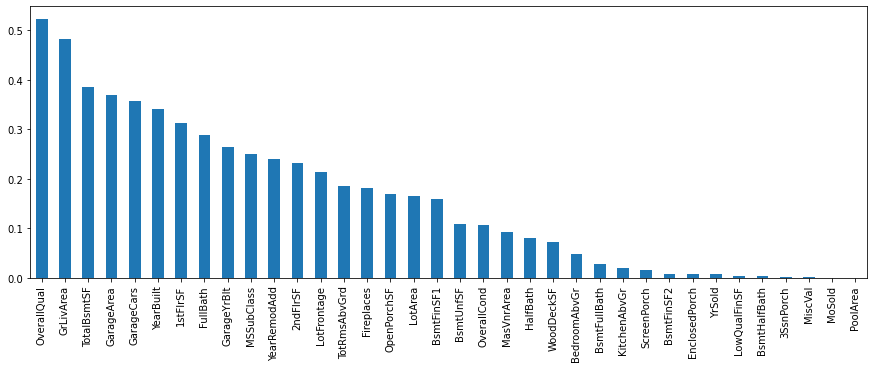

In [19]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [16]:
from sklearn.feature_selection import SelectPercentile

In [17]:
## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train.fillna(0), y_train)


SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x000001DDA4E8E0D8>)

In [18]:
selected_top_columns.get_support()

array([False, False, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False])

In [19]:
X_train.columns[selected_top_columns.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

#### Difference Between Information Gain And Mutual Information
I(X ; Y) = H(X) – H(X | Y)
and
IG(S, a) = H(S) – H(S | a)


As such, mutual information is sometimes used as a synonym for 
information gain. Technically, they calculate the same quantity
if applied to the same data.